**Dhimas Sena Rahmantara**

**dhimassr@gmail.com**

In [2]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import datetime
import math
import warnings
warnings.filterwarnings('ignore')

In [5]:
os.listdir()

['.ipynb_checkpoints', 'retail_sales.csv', 'retail_sales.ipynb']

In [7]:
sdf = pd.read_csv('retail_sales.csv')
sdf

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


In [9]:
sdf.isna().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [11]:
sdf.duplicated().sum()

0

In [13]:
sdf.describe().T

,count,mean,std,min,25%,50%,75%,max
Transaction ID,1000.0,500.500,288.819436,1.0,250.75,500.5,750.25,1000.0
Age,1000.0,41.392,13.681430,18.0,29.00,42.0,53.00,64.0
Quantity,1000.0,2.514,1.132734,1.0,1.00,3.0,4.00,4.0
Price per Unit,1000.0,179.890,189.681356,25.0,30.00,50.0,300.00,500.0
Total Amount,1000.0,456.000,559.997632,25.0,60.00,135.0,900.00,2000.0


In [15]:
sdf.shape

(1000, 9)

In [17]:
sdf.columns

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')

In [19]:
sdf.columns = sdf.columns.str.lower().str.replace(' ', '_')

In [21]:
sdf['date'] = pd.to_datetime(sdf['date'])
sdf = sdf.sort_values(by='date')
sdf

,transaction_id,date,customer_id,gender,age,product_category,quantity,price_per_unit,total_amount
521,522,2023-01-01,CUST522,Male,46,Beauty,3,500,1500
179,180,2023-01-01,CUST180,Male,41,Clothing,3,300,900
558,559,2023-01-01,CUST559,Female,40,Clothing,4,300,1200
302,303,2023-01-02,CUST303,Male,19,Electronics,3,30,90
978,979,2023-01-02,CUST979,Female,19,Beauty,1,25,25
...,...,...,...,...,...,...,...,...,...
232,233,2023-12-29,CUST233,Female,51,Beauty,2,300,600
804,805,2023-12-29,CUST805,Female,30,Beauty,3,500,1500
856,857,2023-12-31,CUST857,Male,60,Electronics,2,25,50
210,211,2024-01-01,CUST211,Male,42,Beauty,3,500,1500


In [23]:
sdf = sdf.drop('transaction_id', axis=1)
sdf = sdf.drop('customer_id', axis=1)
sdf = sdf.reset_index()
sdf = sdf.drop('index', axis=1)

In [25]:
sdf = sdf.drop(sdf.index[-1])
sdf = sdf.drop(sdf.index[-1])
sdf

,date,gender,age,product_category,quantity,price_per_unit,total_amount
0,2023-01-01,Male,46,Beauty,3,500,1500
1,2023-01-01,Male,41,Clothing,3,300,900
2,2023-01-01,Female,40,Clothing,4,300,1200
3,2023-01-02,Male,19,Electronics,3,30,90
4,2023-01-02,Female,19,Beauty,1,25,25
...,...,...,...,...,...,...,...
993,2023-12-29,Male,46,Beauty,4,300,1200
994,2023-12-29,Female,49,Electronics,4,25,100
995,2023-12-29,Female,51,Beauty,2,300,600
996,2023-12-29,Female,30,Beauty,3,500,1500


In [27]:
sdf['gender'].value_counts()

gender
Female    510
Male      488
Name: count, dtype: int64

In [29]:
sdf['product_category'].value_counts()

product_category
Clothing       351
Electronics    341
Beauty         306
Name: count, dtype: int64

In [31]:
sdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              998 non-null    datetime64[ns]
 1   gender            998 non-null    object        
 2   age               998 non-null    int64         
 3   product_category  998 non-null    object        
 4   quantity          998 non-null    int64         
 5   price_per_unit    998 non-null    int64         
 6   total_amount      998 non-null    int64         
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 54.7+ KB


In [33]:
sdf['month'] = sdf['date'].dt.month
sdf

,date,gender,age,product_category,quantity,price_per_unit,total_amount,month
0,2023-01-01,Male,46,Beauty,3,500,1500,1
1,2023-01-01,Male,41,Clothing,3,300,900,1
2,2023-01-01,Female,40,Clothing,4,300,1200,1
3,2023-01-02,Male,19,Electronics,3,30,90,1
4,2023-01-02,Female,19,Beauty,1,25,25,1
...,...,...,...,...,...,...,...,...
993,2023-12-29,Male,46,Beauty,4,300,1200,12
994,2023-12-29,Female,49,Electronics,4,25,100,12
995,2023-12-29,Female,51,Beauty,2,300,600,12
996,2023-12-29,Female,30,Beauty,3,500,1500,12


In [35]:
sdf.corr(numeric_only=True)

,age,quantity,price_per_unit,total_amount,month
age,1.000000,-0.022457,-0.037797,-0.060046,0.001038
quantity,-0.022457,1.000000,0.015763,0.373015,-0.023349
price_per_unit,-0.037797,0.015763,1.000000,0.851381,-0.006744
total_amount,-0.060046,0.373015,0.851381,1.000000,-0.003434
month,0.001038,-0.023349,-0.006744,-0.003434,1.000000


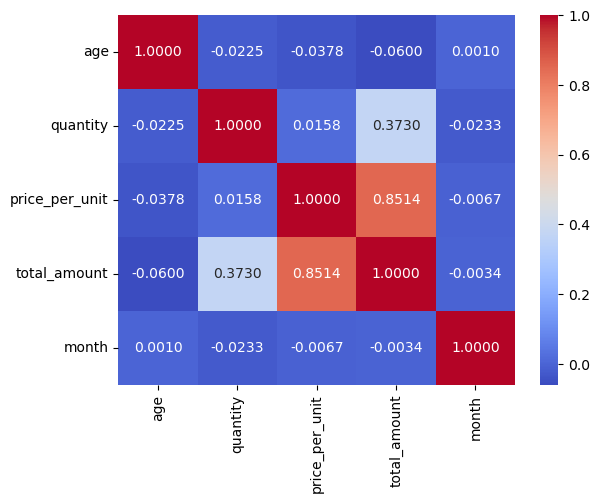

In [37]:
sns.heatmap(sdf.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.4f')
plt.show()

In [39]:
pc_per_gender = sdf.groupby(["product_category", "gender"]).count()
pc_per_gender.reset_index()

,product_category,gender,date,age,quantity,price_per_unit,total_amount,month
0,Beauty,Female,166,166,166,166,166,166
1,Beauty,Male,140,140,140,140,140,140
2,Clothing,Female,174,174,174,174,174,174
3,Clothing,Male,177,177,177,177,177,177
4,Electronics,Female,170,170,170,170,170,170
5,Electronics,Male,171,171,171,171,171,171


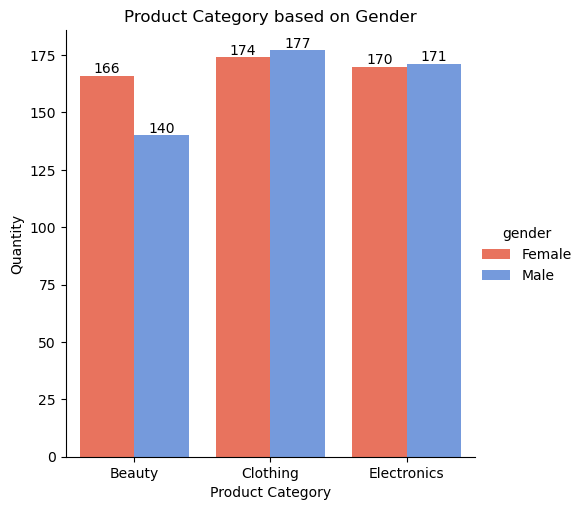

In [41]:
g = sns.catplot(
    data=pc_per_gender, kind="bar",
    x="product_category", y=pc_per_gender["quantity"], hue="gender",
    palette=sns.color_palette(['tomato', 'cornflowerblue']), height=5
)
for ax in g.axes.ravel():
    for c in ax.containers:
        ax.bar_label(c, label_type='edge')

plt.title("Product Category based on Gender")
plt.xlabel("Product Category")
plt.ylabel("Quantity")
plt.show()

In [43]:
purchased_per_month = sdf.groupby(["month"]).count()
purchased_per_month.reset_index()

,month,date,gender,age,product_category,quantity,price_per_unit,total_amount
0,1,76,76,76,76,76,76,76
1,2,85,85,85,85,85,85,85
2,3,73,73,73,73,73,73,73
3,4,86,86,86,86,86,86,86
4,5,105,105,105,105,105,105,105
5,6,77,77,77,77,77,77,77
6,7,72,72,72,72,72,72,72
7,8,94,94,94,94,94,94,94
8,9,65,65,65,65,65,65,65
9,10,96,96,96,96,96,96,96


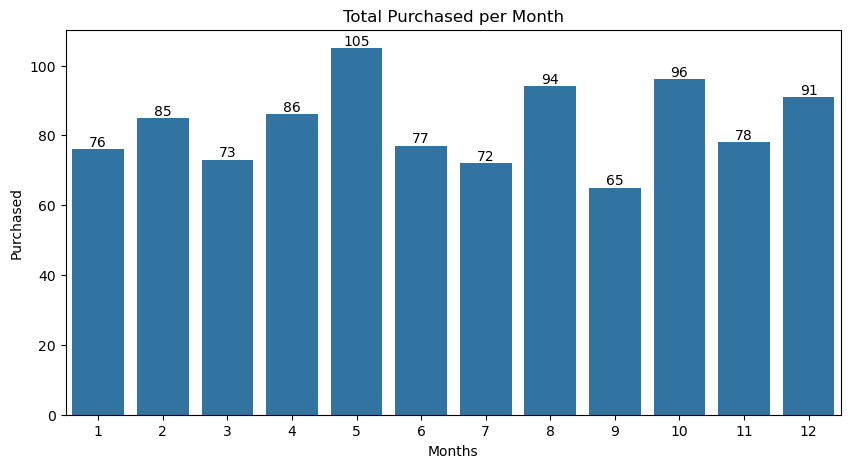

In [45]:
plt.figure(figsize=(10, 5))
g = sns.barplot(
    data=purchased_per_month, x="month", y=purchased_per_month["quantity"]
)
g.bar_label(g.containers[0])
        
plt.title("Total Purchased per Month")
plt.xlabel("Months")
plt.ylabel("Purchased")
plt.show()

In [47]:
total_amount =[]
for i in np.unique(sdf['month']):
    total = sdf[sdf.month == i].total_amount.sum()
    total_amount.append(total)

ta_df = pd.DataFrame(zip(np.unique(sdf['month']), total_amount), columns=['month', 'total_amount'])
ta_df.reset_index()
ta_df

,month,total_amount
0,1,35450
1,2,44060
2,3,28990
3,4,33870
4,5,53150
5,6,36715
6,7,35465
7,8,36960
8,9,23620
9,10,46580


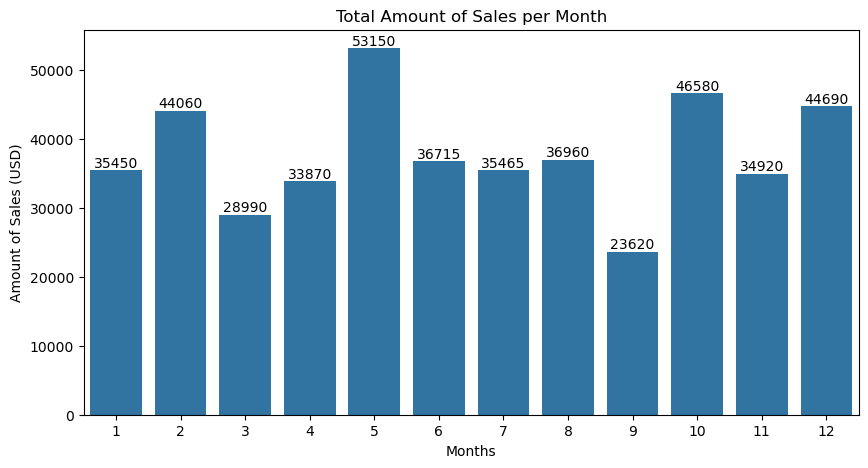

In [49]:
plt.figure(figsize=(10, 5))
g = sns.barplot(
    data=ta_df, x="month", y='total_amount'
)
g.bar_label(g.containers[0])
        
plt.title("Total Amount of Sales per Month")
plt.xlabel("Months")
plt.ylabel("Amount of Sales (USD)")
plt.show()

In [51]:
ta_per_cat = sdf.groupby(['product_category'])['total_amount'].sum()
ta_per_cat

product_category
Beauty         142015
Clothing       155580
Electronics    156875
Name: total_amount, dtype: int64

31.248486042022705
34.23328399658203
34.518229961395264


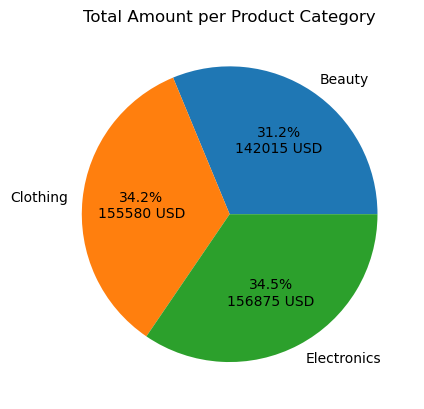

In [53]:
def fmt(x):
    print(x)
    return '{:.1f}%\n{:.0f} USD'.format(x, sum(ta_per_cat)*x/100)

plt.pie(ta_per_cat, labels=np.unique(sdf['product_category']), autopct=fmt)
plt.title("Total Amount per Product Category")
plt.show()

In [55]:
ta_per_gender = sdf.groupby(['gender'])['total_amount'].sum()
ta_per_gender

gender
Female    232840
Male      221630
Name: total_amount, dtype: int64

51.23330354690552
48.76669645309448


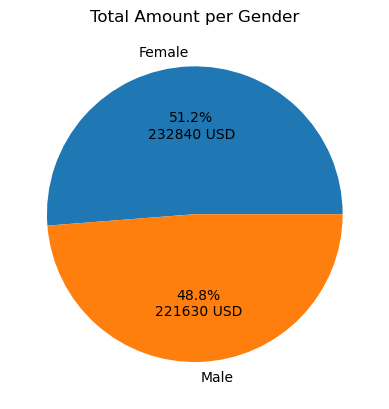

In [57]:
def fmt(x):
    print(x)
    return '{:.1f}%\n{:.0f} USD'.format(x, sum(ta_per_gender)*x/100)

plt.pie(ta_per_gender, labels=np.unique(sdf['gender']), autopct=fmt)
plt.title("Total Amount per Gender")
plt.show()

In [59]:
# ta_per_cat_gender = sdf.groupby(['product_category','gender'])['total_amount'].sum().reset_index()
# ta_per_cat_gender

ta_per_cat_gender = sdf.groupby(by=['product_category','gender']).agg({
    'total_amount': 'sum',
}).reset_index()
ta_per_cat_gender

,product_category,gender,total_amount
0,Beauty,Female,74830
1,Beauty,Male,67185
2,Clothing,Female,81275
3,Clothing,Male,74305
4,Electronics,Female,76735
5,Electronics,Male,80140


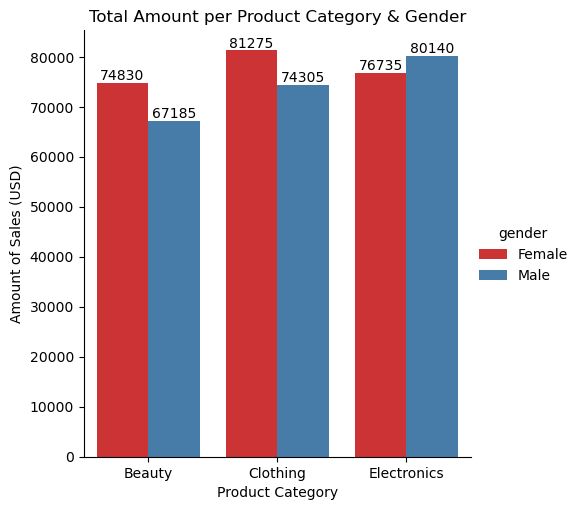

In [61]:
g = sns.catplot(
    data=ta_per_cat_gender, kind="bar",
    x="product_category", y="total_amount", hue="gender", palette="Set1"
)
for ax in g.axes.ravel():
    for c in ax.containers:
        ax.bar_label(c, label_type='edge')

plt.title("Total Amount per Product Category & Gender")
plt.xlabel("Product Category")
plt.ylabel("Amount of Sales (USD)")
plt.show()

In [63]:
ta_per_cat_gender_month = sdf.groupby(by=['product_category','month']).agg({
    'total_amount': 'sum',
}).reset_index()
ta_per_cat_gender_month

,product_category,month,total_amount
0,Beauty,1,12430
1,Beauty,2,14035
2,Beauty,3,10545
3,Beauty,4,11905
4,Beauty,5,12450
5,Beauty,6,10995
6,Beauty,7,16090
7,Beauty,8,9790
8,Beauty,9,6320
9,Beauty,10,15355


<Figure size 1000x500 with 0 Axes>

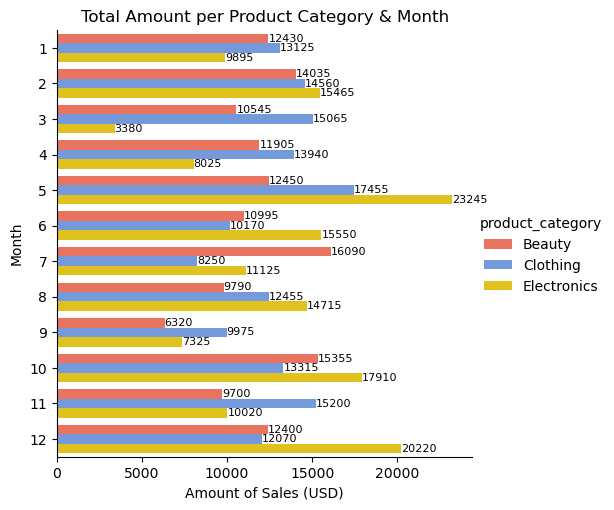

In [65]:
plt.figure(figsize=(10, 5))
g = sns.catplot(
    data=ta_per_cat_gender_month, kind="bar", orient='h',
    x="total_amount", y="month", hue="product_category",
    palette=sns.color_palette(['tomato','cornflowerblue','gold'])
)
for ax in g.axes.ravel():
    for c in ax.containers:
        ax.bar_label(c, label_type='edge', fontsize=8)

plt.title("Total Amount per Product Category & Month")
plt.xlabel("Amount of Sales (USD)")
plt.ylabel("Month")
plt.show()

In [67]:
for i in range(len(sdf)):
    if (sdf.at[i, 'age'] >= 18 and sdf.at[i, 'age'] <= 30):
        sdf.loc[i, 'age_group'] = '18-30'
    elif (sdf.at[i, 'age'] >= 31 and sdf.at[i, 'age'] <= 40):
        sdf.loc[i, 'age_group'] = '31-40'
    elif (sdf.at[i, 'age'] >= 41 and sdf.at[i, 'age'] <= 50):
        sdf.loc[i, 'age_group'] = '41-50'
    elif (sdf.at[i, 'age'] >= 51 and sdf.at[i, 'age'] <= 60):
        sdf.loc[i, 'age_group'] = '51-60'
    elif (sdf.at[i, 'age'] >= 60):
        sdf.loc[i, 'age_group'] = '60+'

In [69]:
ta_per_cat_ag = sdf.groupby(by=['product_category','age_group']).agg({
    'total_amount': 'sum',
}).reset_index()
ta_per_cat_ag

,product_category,age_group,total_amount
0,Beauty,18-30,45710
1,Beauty,31-40,32825
2,Beauty,41-50,31595
3,Beauty,51-60,26835
4,Beauty,60+,5050
5,Clothing,18-30,48670
6,Clothing,31-40,31250
7,Clothing,41-50,29540
8,Clothing,51-60,34990
9,Clothing,60+,11130


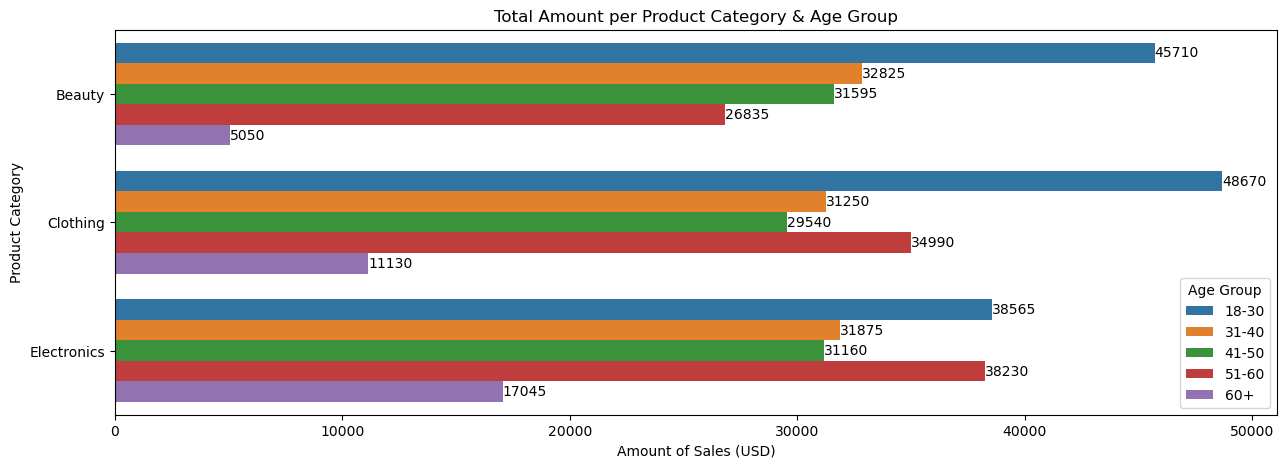

In [71]:
plt.figure(figsize=(15, 5))
g = sns.barplot(
    data=ta_per_cat_ag, x="total_amount", y='product_category', hue='age_group'
)
plt.legend(loc='lower right', title='Age Group')
# g.bar_label(g.containers[0])
for container in g.containers:
    g.bar_label(container)
        
plt.title("Total Amount per Product Category & Age Group")
plt.xlabel("Amount of Sales (USD)")
plt.ylabel("Product Category")
plt.show()

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

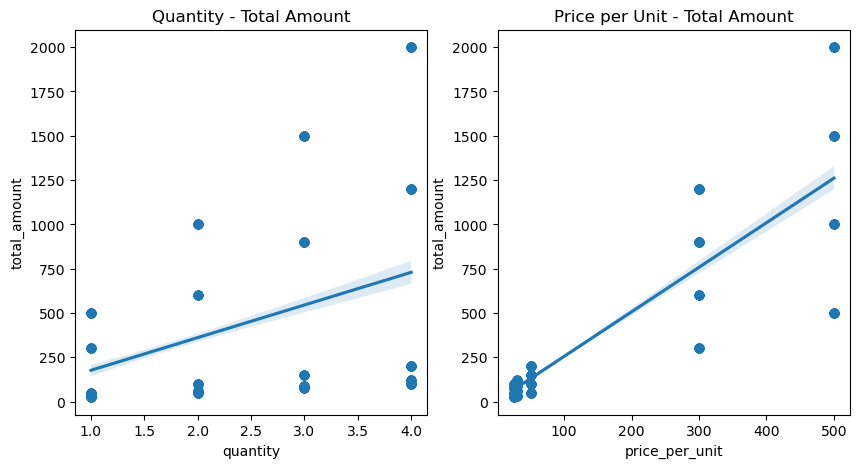

In [77]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.regplot(data=sdf, x='quantity', y='total_amount', ax=axes[0])
axes[0].set_title('Quantity - Total Amount')

sns.regplot(data=sdf, x='price_per_unit', y='total_amount',ax=axes[1])
axes[1].set_title('Price per Unit - Total Amount')

plt.show()

In [79]:
X = sdf[['price_per_unit']]  # Fitur independen
y = sdf['total_amount']  # Target

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [87]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse:.4f}")
print(f"R-squared: {r2:.4f}")
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

MSE: 82506.8971
R-squared: 0.6859
Intercept: 2.8043700490754873
Coefficients: [2.58488223]


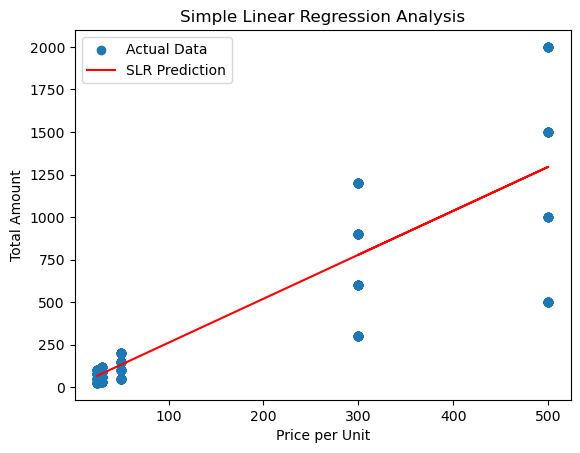

In [89]:
plt.scatter(X_test, y_test, label='Actual Data')
plt.plot(X_test, y_pred, color='red', label='SLR Prediction')
plt.xlabel('Price per Unit')
plt.ylabel('Total Amount')
plt.title('Simple Linear Regression Analysis')
plt.legend()
plt.show()


In [113]:
X = sdf[['quantity']]  # Fitur independen
y = sdf['total_amount']  # Target

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [117]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse:.4f}")
print(f"R-squared: {r2:.4f}")
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

MSE: 201352.6731
R-squared: 0.1442
Intercept: 2.1657280812204363
Coefficients: [184.7525555]


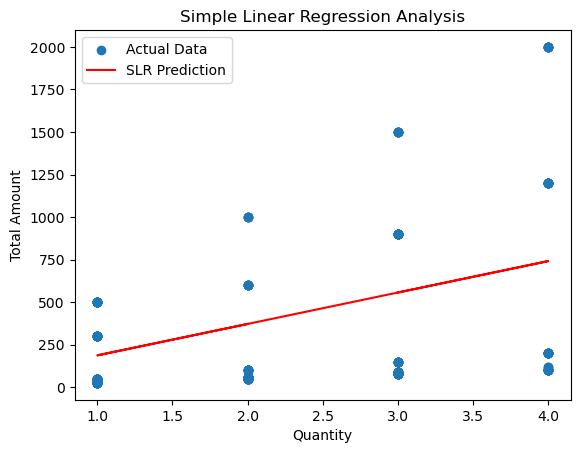

In [119]:
plt.scatter(X_test, y_test, label='Actual Data')
plt.plot(X_test, y_pred, color='red', label='SLR Prediction')
plt.xlabel('Quantity')
plt.ylabel('Total Amount')
plt.title('Simple Linear Regression Analysis')
plt.legend()
plt.show()


In [121]:
X = np.array(sdf['age'])
X = X.reshape(-1,1)
# X = sdf[['age']]  # Fitur independen
y = sdf['total_amount']  # Target
# print(X)

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [125]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse:.4f}")
print(f"R-squared: {r2:.4f}")
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

MSE: 274157.4888
R-squared: -0.0437
Intercept: 637.3845927143516
Coefficients: [-3.37395172]


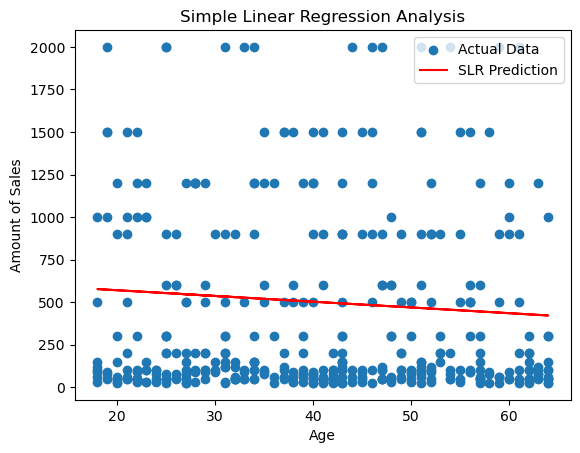

In [127]:
plt.scatter(X_test, y_test, label='Actual Data')
plt.plot(X_test, y_pred, color='red', label='SLR Prediction')
plt.xlabel('Age')
plt.ylabel('Amount of Sales')
plt.title('Simple Linear Regression Analysis')
plt.legend()
plt.show()
